In [92]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


# Create District/Community Function

In [8]:
#Function

def commun(x): 
    if x in [67,68,86,87,88,89,90,91,92]:
        return 'Thomas-Frogtown'
    elif x in [5,6,7,8,25,26,27,28,45,46,47,48]:
        return 'Como'
    elif x in [107, 108, 109, 110,127,128,129,130]: 
        return 'Summit-University'
    elif x in [101,102,103,104,105,106,122,123,124,125,126]: 
        return 'Union Park'
    elif x in [63,64,65,66,83,84,85,86]: 
        return 'Midway' 
    elif x in [142,143,144,145,146,162,163,164,165,166]:
        return 'Macalester_Groveland'
    elif x in [182,183,184,185,186,202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Highland Park'
    elif x in [147,148,149,167,168]:
        return 'Summit Hill'
    elif x in [1,2,21,22,43,44,61,62,81,82]:
        return 'St. Anthony'
    elif x in [226,207,187,188,189,267,268,169,170,171,249,150,151,230]:
        return 'West 7th'
    elif x in [209,210,211,212,213,214,215,192,193,194,195,172,173,174,175]:
        return 'West Side'
    elif x in [111,112,131,132,133,152,153]:
        return 'Capital_River'
    elif x in [98,99,100,118,119,119,120,137,138,139,140,160,197,180,200,240,280]:
        return 'Battle_Creek'
    elif x in [76,95,96,97,115,116,117,138,114,136]:
        return 'Dayton Bluff' 
    elif x in [9,10,11,12,29,30,31,32,49,50,51,52,269,69,70,71,72]:
        return 'North End'
    elif x in [13,14,15,16,33,34,35,36,53,54,55,56,73,74,75,93,94]:
        return 'Payne-Phalen'
    elif x in [17,18,19,20,37,38,39,40,56,57,58,59,60,77,78,79,80]:
        return 'Greater East Side'
    else: 
        return 'NaN'

def district(x):
    if x in [1,2,3,4,5,6,7,8,21,22,23,24,25,26,27,28,43,44,45,46,47,48,\
            61,62,63,64,65,66,67,68,269,81,82,83,84,85,86,87,88,89,\
            101,102,103,104,105,106,107,108,109,110,122,123,124,125,126,\
            127,128,129,130,142,143,144,145,146,147,148,149,149,\
            162,163,164,165,166,167,168,182,183,184,185,186,\
            202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Western'
    elif x in [9,10,11,12,29,30,32,31,49,50,51,52,69,70,71,72,\
              90,91,92,111,112,131,132,133,267,268,249,130,230,\
              150,151,152,153,169,170,171,172,173,174,175,207,209,226,\
              187,188,189,192,193,194,195,210,211,212,213,214,215]:
        return 'Central'
    elif x in [13,14,15,16,17,18,19,20,33,34,35,36,37,38,39,40,\
              53,54,55,56,57,58,59,60,73,74,75,76,77,78,79,80,\
              93,94,95,96,97,98,99,100,114,115,116,117,118,119,120,\
              136,137,138,139,140,160,197,180,200,240,280]:
        return 'Eastern'
    else:
        return 'NaN'
    
# Define Age Function bins
def agef(x):
    if x<19: 
        return 'Teen <19'
    elif x>18 and x<25: 
        return 'Young Adult <25'
    elif x>25 and x<31: 
        return 'Adult <31'
    elif x>30 and x<46: 
        return 'Middle Adult <46' 
    elif x>45: 
        return 'Older Adult >45' 
    else: 
        return 'NaN'    

# Data Prep

Data Prior to 2017 does not provide a reason why a vehicle has been stopped, so not used

In [250]:
#Data Load
df = pd.read_csv('Traffic_Stop_Dataset.csv')

#Change Column Names
cols= ['Year','Date','Race','Gender','Dr_search','V_search','Citation','Age','Reason','Grid','GridLocation', 'Count']
df.columns= cols

#We will be choosing from 2015 to 2018
df= df.query('Year in [2018,2017]')

In [251]:
#Add District Plannning Council and District columns from Functions
df['Community']= df['Grid'].apply(commun)
df['District']= df['Grid'].apply(district)
df['AgeDemo']= df['Age'].apply(agef)

#Add Time Variables
df['Date']= pd.to_datetime(df['Date'])
df['DayofWeek']=df['Date'].dt.dayofweek
df['Weekend'] = df['DayofWeek'].apply(lambda x: 1 if (x>4)  else 0)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['LateNight'] = df['Hour'].apply(lambda x: 1 if (x>21 or x<5)  else 0)

#Screening
df= df[df.Reason != '911 Call / Citizen Reported']
df= df[df.Reason != 'No Data']

#Replace variables with dummies
df['Dr_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['V_search'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Citation'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True) 
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) #FEMALE is 1
df= pd.concat([df,pd.get_dummies(df['Reason'])], axis=1)
df= pd.concat([df,pd.get_dummies(df['Race'])], axis=1)

#df[['Dr_search', 'V_search', Citation']] = df[['Dr_search', 'V_search', 'Gender','Citation']].astype(int)

# Remove any missing community data entries
df= df[df.Community != 'NaN']



# Data Cleaning/Exploration

# Race Breakdown

In [252]:
#Data setuo
data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 

Race_Grp = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Race_Grp.set_index('Race', inplace=True)

#Specify your restrictions respect to community
#rf=df
rf= df.loc[df['Reason'] != 'Investigative Stop']
rf= rf.loc[df['Race'] != 'Native American']



In [254]:

A=round(rf['Race'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Tot_Count', A[0])
Race_Grp.set_value('Black','Tot_Count', A[1])
Race_Grp.set_value('Latino','Tot_Count', A[2])
Race_Grp.set_value('Other','Tot_Count', A[3])
Race_Grp.set_value('White','Tot_Count', A[4])


A= round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Count', A[0])
Race_Grp.set_value('Black','Eq_Count', A[1])
Race_Grp.set_value('Latino','Eq_Count', A[2])
Race_Grp.set_value('Other','Eq_Count', A[3])
Race_Grp.set_value('White','Eq_Count', A[4])
Race_Grp.set_value('Asian','Mov_Count', A[5])
Race_Grp.set_value('Black','Mov_Count', A[6])
Race_Grp.set_value('Latino','Mov_Count', A[7])
Race_Grp.set_value('Other','Mov_Count', A[8])
Race_Grp.set_value('White','Mov_Count', A[9])


A= round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Margin', A[0])
Race_Grp.set_value('Black','Eq_Margin', A[1])
Race_Grp.set_value('Latino','Eq_Margin', A[2])
Race_Grp.set_value('Other','Eq_Margin', A[3])
Race_Grp.set_value('White','Eq_Margin', A[4])
Race_Grp.set_value('Asian','Mov_Margin', A[5])
Race_Grp.set_value('Black','Mov_Margin', A[6])
Race_Grp.set_value('Latino','Mov_Margin', A[7])
Race_Grp.set_value('Other','Mov_Margin', A[8])
Race_Grp.set_value('White','Mov_Margin', A[9])

A=round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Citation_Count', A[5])
Race_Grp.set_value('Black','Citation_Count', A[6])
Race_Grp.set_value('Latino','Citation_Count', A[7])
Race_Grp.set_value('Other','Citation_Count', A[8])
Race_Grp.set_value('White','Citation_Count', A[9])

A= round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Citation', A[10])
Race_Grp.set_value('Black','Eq_Citation', A[12])
Race_Grp.set_value('Latino','Eq_Citation', A[14])
Race_Grp.set_value('Other','Eq_Citation', A[16])
Race_Grp.set_value('White','Eq_Citation', A[18])
Race_Grp.set_value('Asian','Mov_Citation', A[11])
Race_Grp.set_value('Black','Mov_Citation', A[13])
Race_Grp.set_value('Latino','Mov_Citation', A[15])
Race_Grp.set_value('Other','Mov_Citation', A[17])
Race_Grp.set_value('White','Mov_Citation', A[19])

A=round(rf.groupby(['Race'])['Dr_search'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Driversearch_Count', A[5])
Race_Grp.set_value('Black','Driversearch_Count', A[6])
Race_Grp.set_value('Latino','Driversearch_Count', A[7])
Race_Grp.set_value('Other','Driversearch_Count', A[8])
Race_Grp.set_value('White','Driversearch_Count', A[9])

A= round(rf.groupby(['Race','Reason'])['Dr_search'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_DriverSearch', A[10])
Race_Grp.set_value('Black','Eq_DriverSearch', A[12])
Race_Grp.set_value('Latino','Eq_DriverSearch', A[14])
Race_Grp.set_value('Other','Eq_DriverSearch', A[16])
Race_Grp.set_value('White','Eq_DriverSearch', A[18])
Race_Grp.set_value('Asian','Mov_DriverSearch', A[11])
Race_Grp.set_value('Black','Mov_DriverSearch', A[13])
Race_Grp.set_value('Latino','Mov_DriverSearch', A[15])
Race_Grp.set_value('Other','Mov_DriverSearch', A[17])
Race_Grp.set_value('White','Mov_DriverSearch', A[19])

A=round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Gender_F', A[10])
Race_Grp.set_value('Black','Eq_Gender_F', A[12])
Race_Grp.set_value('Latino','Eq_Gender_F', A[14])
Race_Grp.set_value('Other','Eq_Gender_F', A[16])
Race_Grp.set_value('White','Eq_Gender_F', A[18])
Race_Grp.set_value('Asian','Mov_Gender_F', A[11])
Race_Grp.set_value('Black','Mov_Gender_F', A[13])
Race_Grp.set_value('Latino','Mov_Gender_F', A[15])
Race_Grp.set_value('Other','Mov_Gender_F', A[17])
Race_Grp.set_value('White','Mov_Gender_F', A[19])

A=round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','LateNight_Count', A[5])
Race_Grp.set_value('Black','LateNight_Count', A[6])
Race_Grp.set_value('Latino','LateNight_Count', A[7])
Race_Grp.set_value('Other','LateNight_Count', A[8])
Race_Grp.set_value('White','LateNight_Count', A[9])

A=round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_LateNight', A[10])
Race_Grp.set_value('Black','Eq_LateNight', A[12])
Race_Grp.set_value('Latino','Eq_LateNight', A[14])
Race_Grp.set_value('Other','Eq_LateNight', A[16])
Race_Grp.set_value('White','Eq_LateNight', A[18])
Race_Grp.set_value('Asian','Mov_LateNight', A[11])
Race_Grp.set_value('Black','Mov_LateNight', A[13])
Race_Grp.set_value('Latino','Mov_LateNight', A[15])
Race_Grp.set_value('Other','Mov_LateNight', A[17])
Race_Grp.set_value('White','Mov_LateNight', A[19])

#1/3 of data is done during latenight activities
A=round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Morn_Citation', A[10])
Race_Grp.set_value('Black','Morn_Citation', A[12])
Race_Grp.set_value('Latino','Morn_Citation', A[14])
Race_Grp.set_value('Other','Morn_Citation', A[16])
Race_Grp.set_value('White','Morn_Citation', A[18])
Race_Grp.set_value('Asian','Late_Citation', A[11])
Race_Grp.set_value('Black','Late_Citation', A[13])
Race_Grp.set_value('Latino','Late_Citation', A[15])
Race_Grp.set_value('Other','Late_Citation', A[17])
Race_Grp.set_value('White','Late_Citation', A[19])


,Tot_Count,Eq_Count,Mov_Count,Eq_Margin,Mov_Margin,Citation_Count,Eq_Citation,Mov_Citation,Driversearch_Count,Eq_DriverSearch,Mov_DriverSearch,Eq_Gender_F,Mov_Gender_F,LateNight_Count,Eq_LateNight,Mov_LateNight,Morn_Citation,Late_Citation
Race,,,,,,,,,,,,,,,,,,
Asian,7385,1440,5945,0.1950,0.8050,3780,0.1840,0.5913,428,0.0812,0.0523,0.2278,0.3389,2080,0.5222,0.2234,0.6443,0.1740
Black,20581,5636,14945,0.2738,0.7262,9315,0.2032,0.5467,1981,0.1238,0.0858,0.3101,0.3446,6936,0.5234,0.2667,0.5866,0.1890
Latino,3549,780,2769,0.2198,0.7802,1922,0.1962,0.6389,189,0.0731,0.0477,0.3115,0.3395,921,0.4782,0.1979,0.6659,0.1868
Other,3165,604,2561,0.1908,0.8092,1645,0.2550,0.5822,140,0.0629,0.0398,0.3162,0.3319,862,0.5033,0.2179,0.6274,0.2320
White,25281,3680,21601,0.1456,0.8544,15981,0.1823,0.7088,1042,0.0902,0.0329,0.3668,0.4279,4584,0.4940,0.1280,0.7331,0.1760


# Plotting 

Race                Asian  Black  Latino  Other  White
Tot_Count            7385  20581    3549   3165  25281
Eq_Count             1440   5636     780    604   3680
Mov_Count            5945  14945    2769   2561  21601
LateNight_Count      2080   6936     921    862   4584
Citation_Count       3780   9315    1922   1645  15981
Driversearch_Count    428   1981     189    140   1042


Text(0.5, 0, 'Number of Instances')

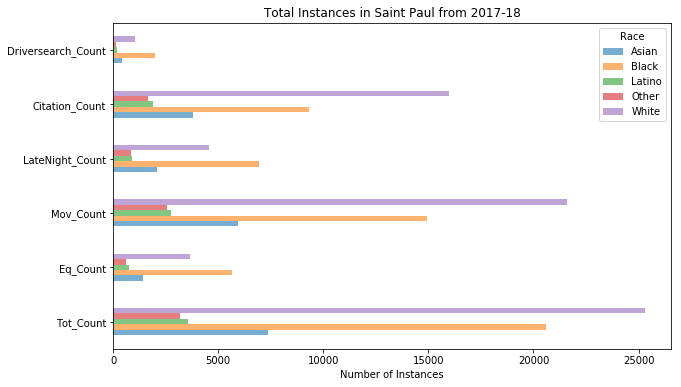

In [255]:
# Graph Based on Counts

#Select Features
Features= ['Tot_Count','Eq_Count', 'Mov_Count','LateNight_Count', 'Citation_Count','Driversearch_Count']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Total Instances in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('Number of Instances')

Race              Asian   Black  Latino   Other   White
Eq_Margin        0.1950  0.2738  0.2198  0.1908  0.1456
Eq_Citation      0.1840  0.2032  0.1962  0.2550  0.1823
Eq_DriverSearch  0.0812  0.1238  0.0731  0.0629  0.0902
Eq_Gender_F      0.2278  0.3101  0.3115  0.3162  0.3668
Eq_LateNight     0.5222  0.5234  0.4782  0.5033  0.4940


Text(0.5, 0, '')

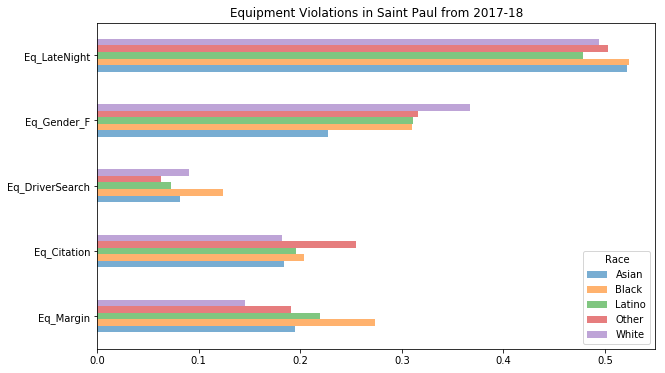

In [212]:
# Graph Based on Counts

#Select Features
Features= ['Eq_Margin','Eq_Citation','Eq_DriverSearch','Eq_Gender_F','Eq_LateNight' ]
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Equipment Violations in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('')

Race               Asian   Black  Latino   Other   White
Mov_Margin        0.8050  0.7262  0.7802  0.8092  0.8544
Mov_Citation      0.5913  0.5467  0.6389  0.5822  0.7088
Mov_DriverSearch  0.0523  0.0858  0.0477  0.0398  0.0329
Mov_Gender_F      0.3389  0.3446  0.3395  0.3319  0.4279
Mov_LateNight     0.2234  0.2667  0.1979  0.2179  0.1280


Text(0.5, 0, '')

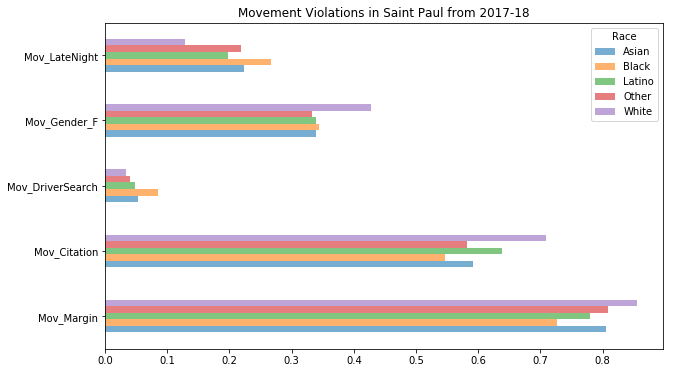

In [256]:
# Graph Based on Counts

#Select Features
Features= ['Mov_Margin','Mov_Citation','Mov_DriverSearch','Mov_Gender_F','Mov_LateNight' ]
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Movement Violations in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('')

Race            Asian   Black  Latino   Other   White
Morn_Citation  0.6443  0.5866  0.6659  0.6274  0.7331
Late_Citation  0.1740  0.1890  0.1868  0.2320  0.1760


Text(0.5, 0, '')

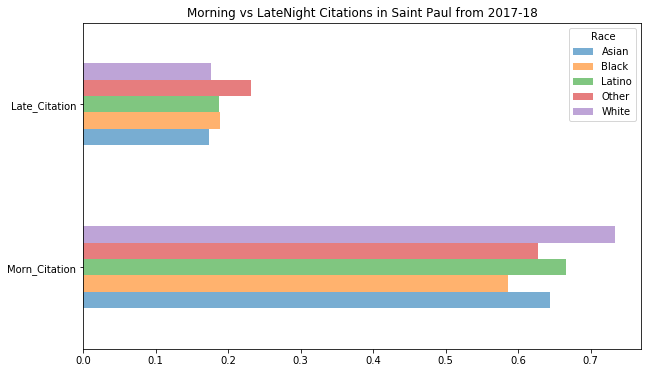

In [257]:
# Graph Based on Counts

#Select Features
Features= ['Morn_Citation','Late_Citation']
df_t= Race_Grp[Features]
df_t = df_t.transpose()
print(df_t)

#Plotting
df_t.plot(kind='barh', figsize=(10, 6),alpha= 0.6)

plt.title('Morning vs LateNight Citations in Saint Paul from 2017-18')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, 'Day of Week (Starting Monday)')

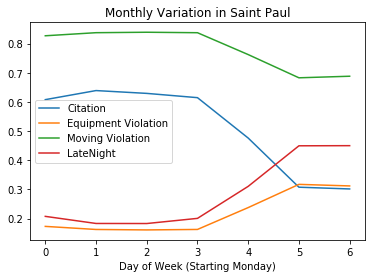

In [214]:
#Traffic Stops by Day
#print(df.columns)

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','DayofWeek']
#print(rf)
B= rf[Features].groupby(['DayofWeek']).sum()
C= B['Count']
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)
#B['Count']=C 

B.plot(kind='line')

plt.title('Monthly Variation in Saint Paul')
plt.ylabel('')
plt.xlabel('Day of Week (Starting Monday)')

Text(0.5, 0, 'Month')

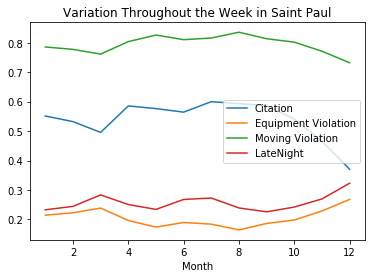

In [186]:
#Traffic Stops by Day
#print(df.columns)
import matplotlib.pyplot as plt

Features= ['Count','Citation','Equipment Violation','Moving Violation','LateNight','Month']
#print(rf)
B= rf[Features].groupby(['Month']).sum()
C= B['Count']
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)
#B['Count']=C 

B.plot(kind='line')

plt.title('Variation Throughout the Week in Saint Paul')
plt.ylabel('')
plt.xlabel('Month')

      Count  Citation  Equipment Violation  Moving Violation  Dr_search
Hour                                                                   
0      4142       749               1782.0            2360.0        517
1      1835       314                700.0            1135.0        276
2       845       142                295.0             550.0        139
3       397        61                138.0             259.0         58
4       261        40                 83.0             178.0         27
5       194        28                 45.0             149.0         13
6       301       207                 23.0             278.0          3
7      1454      1249                 37.0            1417.0         10
8      3565      3113                 96.0            3469.0         22
9      3937      3390                143.0            3794.0         40
10     4173      3552                141.0            4032.0         51
11     2322      1913                117.0            2205.0    

Text(0.5, 0, 'Hour')

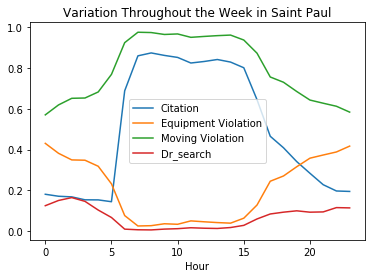

In [229]:
#Traffic Stops by Hour
#print(df.columns)
import matplotlib.pyplot as plt

Features= ['Count','Citation','Equipment Violation','Moving Violation','Dr_search','Hour']


B= rf[Features].groupby(['Hour']).sum()
print(B)
C= B['Count']
B=B.div(B['Count'].values,axis=0)
B.drop(B.columns[[0]], axis=1, inplace=True)
#B['Count']=C 

print(B.head)
B.plot(kind='line')

plt.title('Variation Throughout the Week in Saint Paul')
plt.ylabel('')
plt.xlabel('Hour')

<class 'pandas.core.series.Series'>
['Count', 'Citation', 'Equipment Violation', 'Moving Violation', 'Dr_search', 'Hour']
      Count  Citation  Equipment Violation  Moving Violation  Dr_search
Hour                                                                   
0      4142       749               1782.0            2360.0        517
1      1835       314                700.0            1135.0        276
2       845       142                295.0             550.0        139
3       397        61                138.0             259.0         58
4       261        40                 83.0             178.0         27
5       194        28                 45.0             149.0         13
6       301       207                 23.0             278.0          3
7      1454      1249                 37.0            1417.0         10
8      3565      3113                 96.0            3469.0         22
9      3937      3390                143.0            3794.0         40
10     4173   

Text(0.5, 0, 'Hour')

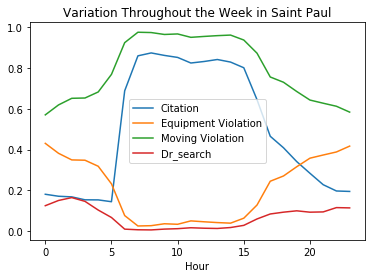

In [230]:
#Traffic Stops by Hour
#print(df.columns)
import matplotlib.pyplot as plt

Features= ['Count','Citation','Equipment Violation','Moving Violation','Dr_search','Hour']

B= rf[Features].groupby(['Hour']).sum()
C= B['Count']
B=B.div(B['Count'].values,axis=0)
print(B)
B.drop(B.columns[[0]], axis=1, inplace=True)

B.plot(kind='line')

plt.title('Variation Throughout the Week in Saint Paul')
plt.ylabel('')
plt.xlabel('Hour')

In [232]:
rf.query('Hour == 8')

,Year,Date,Race,Gender,Dr_search,V_search,Citation,Age,Reason,Grid,...,LateNight,Equipment Violation,Investigative Stop,Moving Violation,Asian,Black,Latino,Native American,Other,White
677810,2017,2017-01-02 08:49:00,Asian,0,0,0,0,NaN,Moving Violation,86.0,...,0,0,0,1,1,0,0,0,0,0
677851,2017,2017-01-03 08:07:00,White,0,0,0,1,26.0,Moving Violation,203.0,...,0,0,0,1,0,0,0,0,0,1
677852,2017,2017-01-03 08:30:00,White,0,0,0,1,27.0,Moving Violation,165.0,...,0,0,0,1,0,0,0,0,0,1
677853,2017,2017-01-03 08:39:00,White,0,0,0,1,45.0,Moving Violation,145.0,...,0,0,0,1,0,0,0,0,0,1
677854,2017,2017-01-03 08:48:00,White,1,0,0,1,28.0,Equipment Violation,165.0,...,0,1,0,0,0,0,0,0,0,1
677960,2017,2017-01-04 08:11:00,Black,0,0,0,1,28.0,Moving Violation,12.0,...,0,0,0,1,0,1,0,0,0,0
677961,2017,2017-01-04 08:11:00,Black,0,0,0,1,41.0,Moving Violation,119.0,...,0,0,0,1,0,1,0,0,0,0
677962,2017,2017-01-04 08:11:00,Black,1,0,0,1,NaN,Moving Violation,48.0,...,0,0,0,1,0,1,0,0,0,0
677963,2017,2017-01-04 08:23:00,White,1,0,0,1,37.0,Moving Violation,203.0,...,0,0,0,1,0,0,0,0,0,1
677964,2017,2017-01-04 08:36:00,White,0,0,0,1,NaN,Moving Violation,48.0,...,0,0,0,1,0,0,0,0,0,1


In [155]:
Features= ['Grid','Count','Citation','Equipment Violation','Moving Violation','Dr_search','V_search','LateNight',\
          'Asian','Black','Latino','White','Other','Gender','Weekend']

#Features2= ['Citation','Equipment Violation','Moving Violation','Dr_search','V_search','LateNight',\
#          'Asian','Black','Latino','White','Other','Gender']

B= rf[Features].groupby(['Grid']).sum()
C= B['Count']
B=B.div(B['Count'].values,axis=0)
B['Count']=C 

#FG.groupby(['Grid','Year']).sum()
B=B.reset_index()
B.Grid = B.Grid.astype(int)
B.Grid = B.Grid.astype(str)
B.head()

,Grid,Count,Citation,Equipment Violation,Moving Violation,LateNight,Asian,Black,Latino,White,Other,Weekend
0,1,60,0.816667,0.116667,0.883333,0.166667,0.100000,0.183333,0.016667,0.650000,0.050000,0.450000
1,2,11,0.909091,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,5,33,0.333333,0.272727,0.727273,0.363636,0.000000,0.303030,0.030303,0.454545,0.212121,0.454545
3,6,29,0.275862,0.241379,0.758621,0.241379,0.000000,0.275862,0.068966,0.586207,0.068966,0.241379
4,7,13,0.230769,0.307692,0.692308,0.230769,0.153846,0.230769,0.000000,0.615385,0.000000,0.076923


In [141]:
#import Programs
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

world_geo = r'Saint Paul Police Grid - Shapefile.geojson'

In [161]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B#B.query('Count < 1000 ')

FG_map.choropleth(
    geo_data=world_geo,
    data=C,
    columns=['Grid','Count'],
    key_on="feature.properties.gridnum", #The District need to be selected
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total'
)

# display map
FG_map

In [162]:
#Create Saint Paul Population Map
FG_map = folium.Map(location=[44.958326, -93.132926], zoom_start=12,tiles="OpenStreetMap")

C= B.query('Count > 100')

FG_map.choropleth(
    geo_data=world_geo,
    data=C,
    columns=['Grid','LateNight'],
    key_on="feature.properties.gridnum", #The District need to be selected
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total'
)

# display map
FG_map

In [ ]:
#Frogtown

In [258]:
#Data setup Frogtown
data = [['Asian',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Black', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Latino', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
        ['Other', 15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5],\
       ['White',15,15,15,0.5,0.5,10,0.5,0.5,10,0.5,0.5,0.5,0.5,10,0.5,0.5,0.5,0.5]] 

Race_Grp = pd.DataFrame(data, columns= ['Race','Tot_Count','Eq_Count','Mov_Count','Eq_Margin','Mov_Margin','Citation_Count','Eq_Citation',\
                                      'Mov_Citation','Driversearch_Count','Eq_DriverSearch','Mov_DriverSearch',\
                                      'Eq_Gender_F','Mov_Gender_F','LateNight_Count','Eq_LateNight','Mov_LateNight',\
                                      'Morn_Citation','Late_Citation'])

Race_Grp.set_index('Race', inplace=True)

#Specify your restrictions respect to community
#rf=df
rf= df.loc[df['Reason'] != 'Investigative Stop']
rf= rf.loc[df['Race'] != 'Native American']
rf= rf.query("Community== 'Thomas-Frogtown'")
rf


,Year,Date,Race,Gender,Dr_search,V_search,Citation,Age,Reason,Grid,...,LateNight,Equipment Violation,Investigative Stop,Moving Violation,Asian,Black,Latino,Native American,Other,White
677788,2017,2017-01-01 17:49:00,Black,0,0,0,0,NaN,Moving Violation,92.0,...,0,0,0,1,0,1,0,0,0,0
677799,2017,2017-01-01 22:26:00,Black,0,0,0,1,37.0,Moving Violation,88.0,...,1,0,0,1,0,1,0,0,0,0
677802,2017,2017-01-01 23:20:00,Black,1,1,1,1,19.0,Equipment Violation,89.0,...,1,1,0,0,0,1,0,0,0,0
677810,2017,2017-01-02 08:49:00,Asian,0,0,0,0,NaN,Moving Violation,86.0,...,0,0,0,1,1,0,0,0,0,0
677825,2017,2017-01-02 17:49:00,Black,0,0,0,0,NaN,Equipment Violation,92.0,...,0,1,0,0,0,1,0,0,0,0
677829,2017,2017-01-02 18:12:00,Black,1,0,0,0,NaN,Equipment Violation,88.0,...,0,1,0,0,0,1,0,0,0,0
677832,2017,2017-01-02 18:34:00,Black,0,0,0,0,NaN,Equipment Violation,90.0,...,0,1,0,0,0,1,0,0,0,0
677871,2017,2017-01-03 10:28:00,Black,0,0,0,1,NaN,Moving Violation,86.0,...,0,0,0,1,0,1,0,0,0,0
677875,2017,2017-01-03 11:08:00,White,1,0,0,1,46.0,Moving Violation,68.0,...,0,0,0,1,0,0,0,0,0,1
677880,2017,2017-01-03 11:45:00,Black,0,0,0,1,23.0,Moving Violation,89.0,...,0,0,0,1,0,1,0,0,0,0


In [259]:

A=round(rf['Race'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Tot_Count', A[0])
Race_Grp.set_value('Black','Tot_Count', A[1])
Race_Grp.set_value('Latino','Tot_Count', A[2])
Race_Grp.set_value('Other','Tot_Count', A[3])
Race_Grp.set_value('White','Tot_Count', A[4])


A= round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Count', A[0])
Race_Grp.set_value('Black','Eq_Count', A[1])
Race_Grp.set_value('Latino','Eq_Count', A[2])
Race_Grp.set_value('Other','Eq_Count', A[3])
Race_Grp.set_value('White','Eq_Count', A[4])
Race_Grp.set_value('Asian','Mov_Count', A[5])
Race_Grp.set_value('Black','Mov_Count', A[6])
Race_Grp.set_value('Latino','Mov_Count', A[7])
Race_Grp.set_value('Other','Mov_Count', A[8])
Race_Grp.set_value('White','Mov_Count', A[9])


A= round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Margin', A[0])
Race_Grp.set_value('Black','Eq_Margin', A[1])
Race_Grp.set_value('Latino','Eq_Margin', A[2])
Race_Grp.set_value('Other','Eq_Margin', A[3])
Race_Grp.set_value('White','Eq_Margin', A[4])
Race_Grp.set_value('Asian','Mov_Margin', A[5])
Race_Grp.set_value('Black','Mov_Margin', A[6])
Race_Grp.set_value('Latino','Mov_Margin', A[7])
Race_Grp.set_value('Other','Mov_Margin', A[8])
Race_Grp.set_value('White','Mov_Margin', A[9])

A=round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Citation_Count', A[5])
Race_Grp.set_value('Black','Citation_Count', A[6])
Race_Grp.set_value('Latino','Citation_Count', A[7])
Race_Grp.set_value('Other','Citation_Count', A[8])
Race_Grp.set_value('White','Citation_Count', A[9])

A= round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Citation', A[10])
Race_Grp.set_value('Black','Eq_Citation', A[12])
Race_Grp.set_value('Latino','Eq_Citation', A[14])
Race_Grp.set_value('Other','Eq_Citation', A[16])
Race_Grp.set_value('White','Eq_Citation', A[18])
Race_Grp.set_value('Asian','Mov_Citation', A[11])
Race_Grp.set_value('Black','Mov_Citation', A[13])
Race_Grp.set_value('Latino','Mov_Citation', A[15])
Race_Grp.set_value('Other','Mov_Citation', A[17])
Race_Grp.set_value('White','Mov_Citation', A[19])

A=round(rf.groupby(['Race'])['Dr_search'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Driversearch_Count', A[5])
Race_Grp.set_value('Black','Driversearch_Count', A[6])
Race_Grp.set_value('Latino','Driversearch_Count', A[7])
Race_Grp.set_value('Other','Driversearch_Count', A[8])
Race_Grp.set_value('White','Driversearch_Count', A[9])

A= round(rf.groupby(['Race','Reason'])['Dr_search'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_DriverSearch', A[10])
Race_Grp.set_value('Black','Eq_DriverSearch', A[12])
Race_Grp.set_value('Latino','Eq_DriverSearch', A[14])
Race_Grp.set_value('Other','Eq_DriverSearch', A[16])
Race_Grp.set_value('White','Eq_DriverSearch', A[18])
Race_Grp.set_value('Asian','Mov_DriverSearch', A[11])
Race_Grp.set_value('Black','Mov_DriverSearch', A[13])
Race_Grp.set_value('Latino','Mov_DriverSearch', A[15])
Race_Grp.set_value('Other','Mov_DriverSearch', A[17])
Race_Grp.set_value('White','Mov_DriverSearch', A[19])

A=round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Gender_F', A[10])
Race_Grp.set_value('Black','Eq_Gender_F', A[12])
Race_Grp.set_value('Latino','Eq_Gender_F', A[14])
Race_Grp.set_value('Other','Eq_Gender_F', A[16])
Race_Grp.set_value('White','Eq_Gender_F', A[18])
Race_Grp.set_value('Asian','Mov_Gender_F', A[11])
Race_Grp.set_value('Black','Mov_Gender_F', A[13])
Race_Grp.set_value('Latino','Mov_Gender_F', A[15])
Race_Grp.set_value('Other','Mov_Gender_F', A[17])
Race_Grp.set_value('White','Mov_Gender_F', A[19])

A=round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','LateNight_Count', A[5])
Race_Grp.set_value('Black','LateNight_Count', A[6])
Race_Grp.set_value('Latino','LateNight_Count', A[7])
Race_Grp.set_value('Other','LateNight_Count', A[8])
Race_Grp.set_value('White','LateNight_Count', A[9])

A=round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_LateNight', A[10])
Race_Grp.set_value('Black','Eq_LateNight', A[12])
Race_Grp.set_value('Latino','Eq_LateNight', A[14])
Race_Grp.set_value('Other','Eq_LateNight', A[16])
Race_Grp.set_value('White','Eq_LateNight', A[18])
Race_Grp.set_value('Asian','Mov_LateNight', A[11])
Race_Grp.set_value('Black','Mov_LateNight', A[13])
Race_Grp.set_value('Latino','Mov_LateNight', A[15])
Race_Grp.set_value('Other','Mov_LateNight', A[17])
Race_Grp.set_value('White','Mov_LateNight', A[19])

#1/3 of data is done during latenight activities
A=round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Morn_Citation', A[10])
Race_Grp.set_value('Black','Morn_Citation', A[12])
Race_Grp.set_value('Latino','Morn_Citation', A[14])
Race_Grp.set_value('Other','Morn_Citation', A[16])
Race_Grp.set_value('White','Morn_Citation', A[18])
Race_Grp.set_value('Asian','Late_Citation', A[11])
Race_Grp.set_value('Black','Late_Citation', A[13])
Race_Grp.set_value('Latino','Late_Citation', A[15])
Race_Grp.set_value('Other','Late_Citation', A[17])
Race_Grp.set_value('White','Late_Citation', A[19])


,Tot_Count,Eq_Count,Mov_Count,Eq_Margin,Mov_Margin,Citation_Count,Eq_Citation,Mov_Citation,Driversearch_Count,Eq_DriverSearch,Mov_DriverSearch,Eq_Gender_F,Mov_Gender_F,LateNight_Count,Eq_LateNight,Mov_LateNight,Morn_Citation,Late_Citation
Race,,,,,,,,,,,,,,,,,,
Asian,702,167,535,0.2379,0.7621,317,0.2515,0.5140,30,0.0539,0.0393,0.2335,0.3421,223,0.5210,0.2542,0.5553,0.2287
Black,2907,1057,1850,0.3636,0.6364,974,0.2157,0.4032,407,0.1485,0.1351,0.3198,0.3216,1390,0.5790,0.4205,0.4661,0.1921
Latino,253,84,169,0.3320,0.6680,105,0.1786,0.5325,21,0.1310,0.0592,0.3452,0.2899,89,0.4762,0.2899,0.5122,0.2360
Other,393,99,294,0.2519,0.7481,150,0.2424,0.4286,24,0.0707,0.0578,0.3939,0.3333,152,0.5556,0.3299,0.4896,0.2105
White,1657,387,1270,0.2336,0.7664,845,0.1886,0.6079,107,0.1189,0.0480,0.3566,0.4071,490,0.5478,0.2189,0.6384,0.2041


In [260]:
#graphs

In [ ]:

A= round(rf.groupby(['Race'])['Reason'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Count', A[0])
Race_Grp.set_value('Black','Eq_Count', A[1])
Race_Grp.set_value('Latino','Eq_Count', A[2])
Race_Grp.set_value('Other','Eq_Count', A[3])
Race_Grp.set_value('White','Eq_Count', A[4])
Race_Grp.set_value('Asian','Mov_Count', A[5])
Race_Grp.set_value('Black','Mov_Count', A[6])
Race_Grp.set_value('Latino','Mov_Count', A[7])
Race_Grp.set_value('Other','Mov_Count', A[8])
Race_Grp.set_value('White','Mov_Count', A[9])


A= round(rf.groupby(['Race'])['Reason'].value_counts(normalize=True).sort_index(level=1),4)
Race_Grp.set_value('Asian','Eq_Margin', A[0])
Race_Grp.set_value('Black','Eq_Margin', A[1])
Race_Grp.set_value('Latino','Eq_Margin', A[2])
Race_Grp.set_value('Other','Eq_Margin', A[3])
Race_Grp.set_value('White','Eq_Margin', A[4])
Race_Grp.set_value('Asian','Mov_Margin', A[5])
Race_Grp.set_value('Black','Mov_Margin', A[6])
Race_Grp.set_value('Latino','Mov_Margin', A[7])
Race_Grp.set_value('Other','Mov_Margin', A[8])
Race_Grp.set_value('White','Mov_Margin', A[9])

A=round(rf.groupby(['Race'])['Citation'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Citation_Count', A[0])
Race_Grp.set_value('Black','Citation_Count', A[1])
Race_Grp.set_value('Latino','Citation_Count', A[2])
Race_Grp.set_value('Other','Citation_Count', A[3])
Race_Grp.set_value('White','Citation_Count', A[4])

A= round(rf.groupby(['Race','Reason'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Citation', A[10])
Race_Grp.set_value('Black','Eq_Citation', A[12])
Race_Grp.set_value('Latino','Eq_Citation', A[14])
Race_Grp.set_value('Other','Eq_Citation', A[16])
Race_Grp.set_value('White','Eq_Citation', A[18])
Race_Grp.set_value('Asian','Mov_Citation', A[11])
Race_Grp.set_value('Black','Mov_Citation', A[13])
Race_Grp.set_value('Latino','Mov_Citation', A[15])
Race_Grp.set_value('Other','Mov_Citation', A[17])
Race_Grp.set_value('White','Mov_Citation', A[19])

A=round(rf.groupby(['Race'])['Dr_search'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','Driversearch_Count', A[0])
Race_Grp.set_value('Black','Driversearch_Count', A[1])
Race_Grp.set_value('Latino','Driversearch_Count', A[2])
Race_Grp.set_value('Other','Driversearch_Count', A[3])
Race_Grp.set_value('White','Driversearch_Count', A[4])

A= round(rf.groupby(['Race','Reason'])['Dr_search'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_DriverSearch', A[10])
Race_Grp.set_value('Black','Eq_DriverSearch', A[12])
Race_Grp.set_value('Latino','Eq_DriverSearch', A[14])
Race_Grp.set_value('Other','Eq_DriverSearch', A[16])
Race_Grp.set_value('White','Eq_DriverSearch', A[18])
Race_Grp.set_value('Asian','Mov_DriverSearch', A[11])
Race_Grp.set_value('Black','Mov_DriverSearch', A[13])
Race_Grp.set_value('Latino','Mov_DriverSearch', A[15])
Race_Grp.set_value('Other','Mov_DriverSearch', A[17])
Race_Grp.set_value('White','Mov_DriverSearch', A[19])

A=round(rf.groupby(['Race','Reason'])['Gender'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_Gender_F', A[10])
Race_Grp.set_value('Black','Eq_Gender_F', A[12])
Race_Grp.set_value('Latino','Eq_Gender_F', A[14])
Race_Grp.set_value('Other','Eq_Gender_F', A[16])
Race_Grp.set_value('White','Eq_Gender_F', A[18])
Race_Grp.set_value('Asian','Mov_Gender_F', A[11])
Race_Grp.set_value('Black','Mov_Gender_F', A[13])
Race_Grp.set_value('Latino','Mov_Gender_F', A[15])
Race_Grp.set_value('Other','Mov_Gender_F', A[17])
Race_Grp.set_value('White','Mov_Gender_F', A[19])

A=round(rf.groupby(['Race'])['LateNight'].value_counts().sort_index(level=1),4)
Race_Grp.set_value('Asian','LateNight_Count', A[0])
Race_Grp.set_value('Black','LateNight_Count', A[1])
Race_Grp.set_value('Latino','LateNight_Count', A[2])
Race_Grp.set_value('Other','LateNight_Count', A[3])
Race_Grp.set_value('White','LateNight_Count', A[4])

A=round(rf.groupby(['Race','Reason'])['LateNight'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Eq_LateNight', A[10])
Race_Grp.set_value('Black','Eq_LateNight', A[12])
Race_Grp.set_value('Latino','Eq_LateNight', A[14])
Race_Grp.set_value('Other','Eq_LateNight', A[16])
Race_Grp.set_value('White','Eq_LateNight', A[18])
Race_Grp.set_value('Asian','Mov_LateNight', A[11])
Race_Grp.set_value('Black','Mov_LateNight', A[13])
Race_Grp.set_value('Latino','Mov_LateNight', A[15])
Race_Grp.set_value('Other','Mov_LateNight', A[17])
Race_Grp.set_value('White','Mov_LateNight', A[19])

#1/3 of data is done during latenight activities
A=round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=2),4)
Race_Grp.set_value('Asian','Morn_Citation', A[10])
Race_Grp.set_value('Black','Morn_Citation', A[12])
Race_Grp.set_value('Latino','Morn_Citation', A[14])
Race_Grp.set_value('Other','Morn_Citation', A[16])
Race_Grp.set_value('White','Morn_Citation', A[18])
Race_Grp.set_value('Asian','Late_Citation', A[11])
Race_Grp.set_value('Black','Late_Citation', A[13])
Race_Grp.set_value('Latino','Late_Citation', A[15])
Race_Grp.set_value('Other','Late_Citation', A[17])
Race_Grp.set_value('White','Late_Citation', A[19])


#print(round(rf.groupby(['Race','LateNight'])['Citation'].value_counts(normalize=True).sort_index(level=1),4))
#= A[2]
#'Eq_Margin','Mov_Margin','Eq_Citation','Mov_Citation','Eq_DriverSearch',
#Race_Grp.iloc[2][1] = A[4]
#Race_Grp.iloc[3][1] = A[3]
#Race_Grp.iloc[4][1] = A[1]

print(Race_Grp)

x = ['Como','Midway']

#df.loc[df['column_name'] == some_value]
dict_stat = {}

#df.query('YEAROFSTOP in [2018]')
for j in (x):
    rf= df.loc[df['Community'] == j]  
    A=round(rf['Race'].value_counts().sort_index(level=1),4)
    Race_Grp.set_value('Asian','Tot_Count', A[0])
    Race_Grp.set_value('Black','Tot_Count', A[1])
    Race_Grp.set_value('Latino','Tot_Count', A[2])
    Race_Grp.set_value('Native American','Tot_Count', A[3])
    Race_Grp.set_value('Other','Tot_Count', A[4])
    Race_Grp.set_value('White','Tot_Count', A[5])
    
    
    
    
    "df_{}".format(j) = Race_Grp
    #dict_stat["df_{}".format(j)] = Race_Grp
    #print(Race_Grp)
    #print(i)
    #print(j)
    #y[0]= Race_Grp
    #print(Race_Grp)


    print(df_Como)  
#print(dict_stat['df_Midway'])
#print(dict_stat.keys())
